<h1>Analisis de los datos</h1>
Al realizar el analisis de los datos, nos damos cuenta de que hay muchas columnas que no son realmente útiles para nuestro objetivo como nombres, enlaces, ids, etc...
A su misma vez, también podemos ver unas columnas que podrían ser nuestro target, las cuales son el número de likes, número de retweets y número de respuestas en el twit.

In [184]:
from pathlib import Path

import pandas as pd
import plotnine as pn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 2)
pd.set_option('display.max_columns', 500)

data_loc = Path('data/')
handles_file = data_loc / '2021-08-11-handles-data.csv'
tweet_file = data_loc / '2021-08-11-2021-08-12-2021-08-19-tweets-data.csv'

twitter_users = pd.read_csv(handles_file)
twitter_tweets = pd.read_csv(tweet_file)

c:\Users\Usuario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.


In [185]:
twitter_tweets.shape

(40581, 38)

In [186]:

frames = [twitter_tweets, twitter_users]

twitter_all = twitter_tweets.merge(twitter_users, left_on='user_id', right_on='id')

df = pd.DataFrame()
twitter_all

,id_x,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username_x,name_x,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,id_y,name_y,username_y,bio,url,join_datetime,join_date,join_time,tweets,location,following,followers,likes,media,private,verified,avatar,background_image
0,1425590913959612419,1425590913959612419,1.628722e+12,2021-08-12 00:52:14,200,NaN,RT @girlsalliance: We're so proud of the four ...,en,[],[],409486555,409486555,MichelleObama,Michelle Obama,4,0,https://twitter.com/MichelleObama/status/14255...,[],[],0,NaN,True,0,0,232,0,None,NaN,NaN,NaN,1.047165e+18,We're so proud of the four organizations in ou...,1.425590e+18,[],2021-08-12 00:46:58 CEST,NaN,NaN,NaN,409486555,Michelle Obama,MichelleObama,Girl from the South Side and former First Lady...,https://t.co/HPYP9ad13Y,2011-11-10 20:13:01 UTC,2011-11-10,20:13:01 UTC,1770,"Washington, DC",16,20854298,184,461,False,True,https://pbs.twimg.com/profile_images/136674780...,https://pbs.twimg.com/profile_banners/40948655...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40866,1427335350658158598,1427335350658158598,1.629138e+12,2021-08-16 20:24:00,200,NaN,#Agenda111 https://t.co/M1FYBKXqK3,und,['agenda111'],[],247217109,247217109,NAkufoAddo,Nana Akufo-Addo,1,20,https://twitter.com/NAkufoAddo/status/14273353...,[],['https://pbs.twimg.com/media/E87p7qmWYAMWGNE....,1,https://pbs.twimg.com/media/E87p7qmWYAMWGNE.jpg,False,4085,425,561,0,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,247217109,Nana Akufo-Addo,NAkufoAddo,Official Twitter account of Nana Addo Dankwa A...,https://t.co/UjPxYDnTjR,2011-02-04 10:14:22 UTC,2011-02-04,10:14:22 UTC,7744,Ghana,352,2003463,338,1499,False,True,https://pbs.twimg.com/profile_images/817691975...,https://pbs.twimg.com/profile_banners/24721710...


In [187]:
df.insert(0, "nlikes", twitter_all["nlikes"])
df.insert(1, "nreplies", twitter_all["nreplies"])
df.insert(2, "nretweets", twitter_all["nretweets"])
df.insert(3, "usrverified", twitter_all["verified"])
df.insert(4, "video", twitter_all["video"])
df.insert(5, "photo", twitter_all["photos"])
df.insert(6, "language", twitter_all["language"])
df.insert(7, "hashtags", twitter_all["hashtags"])
df.insert(8, "followers", twitter_all["followers"])


Viendo estos datos, nos damos cuenta de los sigueientes problemas:
- La columna de 'photo' es un array que contiene las url de las fotos del tweet. Habrá que convertir esto a un valor más legible por el modelo
- La columna de 'languaje' muestra el lenguaje en el que está escrito el tweet. Usando un OneHotEncoder, se solucionará este problema más adelante
- La columna de 'hashtags' pasa lo mismo que en la columna de 'photo', pero sustituyendo la url por el hashtag en sí

In [188]:
pd.set_option('display.max_rows', 25) # show all rows
df

,nlikes,nreplies,nretweets,usrverified,video,photo,language,hashtags,followers
0,0,0,232,True,0,[],en,[],20854298
1,5266,368,408,True,1,['https://pbs.twimg.com/media/E9BXG4YVkAAl3_A....,en,"['shoesdaytuesday', 'afterskewlslide']",108819032
2,0,0,764,True,0,[],en,[],108819032
3,5638,476,438,True,0,[],en,[],108819032
4,8810,546,1211,True,0,[],en,[],108819032
...,...,...,...,...,...,...,...,...,...
40862,961,90,192,True,1,['https://pbs.twimg.com/media/E8_UqTeX0AoP7pB....,en,['agenda111'],2003463
40863,224,12,48,True,1,['https://pbs.twimg.com/media/E8_UOCbWYAAWdac....,en,['agenda111'],2003463
40864,240,12,51,True,1,['https://pbs.twimg.com/media/E8_UNXIWQAACaRG....,en,['agenda111'],2003463
40865,1357,113,295,True,1,['https://pbs.twimg.com/media/E8_UMhMXIAIrQWT....,en,['agenda111'],2003463


In [189]:
df_test = df

<h1>Normalización y procesamiento de datos</h1>

Para los lenguajes, se ha decidido usar un OneHotEncoder para poder cambiar los valores de string tales como 'eng' o 'es' a valores númericos que tengan mas impacto en nuestro modelo

In [190]:
from sklearn.preprocessing import OneHotEncoder

enc_ohe = OneHotEncoder(sparse=False)
enc_ohe.fit(df[['language']])
data_encoder = enc_ohe.transform(df[['language']])

featured_names = enc_ohe.get_feature_names(input_features=['language'])
df_encoder = pd.DataFrame(data_encoder, columns = list(featured_names))

df = df.join(df_encoder)
df.drop(columns = ['language'], inplace = True)

La columna de 'video' contiene un 0 o 1 dependiendo si el twit contiene una foto. En la columna de 'photo' no. En esta columna, se ofrece un array con un enlace a la foto. Debido a esto, se ha decidido transformar el valor de este array a un 0 o 1, exactamente igual que la columna de 'video'. Para los followers, he mostrado los cuantiles, he usado estos valores para mapear los followers y hacer una relación de clases para clasificar a cada usuario con un número dependiendo de los followers que tenga. También cambiamos el tipo de valor para la columna 'usrverified' a int

In [191]:
print(df_test.followers.quantile([0.20, 0.40, 0.60, 0.80]))

0.2     2408509.0
0.4     3983728.0
0.6     6941080.0
0.8    16749405.0
Name: followers, dtype: float64


In [192]:
df['photo'] = (df['photo'] != '[]')
df['photo'] = df['photo'].astype(int)
df['hashtags'] = (df['hashtags'] != '[]')
df['hashtags'] = df['hashtags'].astype(int)
df['followers'] = df['followers'].map(
lambda x:
1 if x < 2408509 else (
    2 if x < 3983728 else (
        3 if x < 6941080 else (
            4 if x < 16749405 else 5))))
df['usrverified'] = df['usrverified'].astype(int)

df

,nlikes,nreplies,nretweets,usrverified,video,photo,hashtags,followers,language_ar,language_ca,language_cs,language_cy,language_da,language_de,language_en,language_es,language_et,language_eu,language_fa,language_fi,language_fr,language_hi,language_ht,language_hu,language_in,language_is,language_it,language_iw,language_ja,language_ko,language_lt,language_lv,language_mr,language_nl,language_no,language_pl,language_pt,language_ro,language_ru,language_sv,language_ta,language_th,language_tl,language_tr,language_und,language_ur,language_vi,language_zh
0,0,0,232,1,0,0,0,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5266,368,408,1,1,1,1,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,764,1,0,0,0,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5638,476,438,1,0,0,0,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8810,546,1211,1,0,0,0,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40862,961,90,192,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40863,224,12,48,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40864,240,12,51,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40865,1357,113,295,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [193]:
df

,nlikes,nreplies,nretweets,usrverified,video,photo,hashtags,followers,language_ar,language_ca,language_cs,language_cy,language_da,language_de,language_en,language_es,language_et,language_eu,language_fa,language_fi,language_fr,language_hi,language_ht,language_hu,language_in,language_is,language_it,language_iw,language_ja,language_ko,language_lt,language_lv,language_mr,language_nl,language_no,language_pl,language_pt,language_ro,language_ru,language_sv,language_ta,language_th,language_tl,language_tr,language_und,language_ur,language_vi,language_zh
0,0,0,232,1,0,0,0,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5266,368,408,1,1,1,1,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,764,1,0,0,0,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5638,476,438,1,0,0,0,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8810,546,1211,1,0,0,0,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40862,961,90,192,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40863,224,12,48,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40864,240,12,51,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40865,1357,113,295,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Comprobamos valores nulos y si hay alguno, eliminamos las filas donde estén

In [194]:
df.isnull().sum()

nlikes          0
nreplies        0
nretweets       0
usrverified     0
video           0
               ..
language_tr     0
language_und    0
language_ur     0
language_vi     0
language_zh     0
Length: 48, dtype: int64

In [195]:
df.isna().sum()

nlikes          0
nreplies        0
nretweets       0
usrverified     0
video           0
               ..
language_tr     0
language_und    0
language_ur     0
language_vi     0
language_zh     0
Length: 48, dtype: int64

In [196]:
df.drop(df[df['language_da'].isna()].index, inplace = True)
df.drop(df[df['language_en'].isna()].index, inplace = True)
df.drop(df[df['language_es'].isna()].index, inplace = True)
df.drop(df[df['language_fr'].isna()].index, inplace = True)
df.drop(df[df['language_ht'].isna()].index, inplace = True)
df.drop(df[df['language_und'].isna()].index, inplace = True)

In [197]:
pd.set_option('display.max_rows', 30) 
df.head(30)

,nlikes,nreplies,nretweets,usrverified,video,photo,hashtags,followers,language_ar,language_ca,language_cs,language_cy,language_da,language_de,language_en,language_es,language_et,language_eu,language_fa,language_fi,language_fr,language_hi,language_ht,language_hu,language_in,language_is,language_it,language_iw,language_ja,language_ko,language_lt,language_lv,language_mr,language_nl,language_no,language_pl,language_pt,language_ro,language_ru,language_sv,language_ta,language_th,language_tl,language_tr,language_und,language_ur,language_vi,language_zh
0,0,0,232,1,0,0,0,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5266,368,408,1,1,1,1,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,764,1,0,0,0,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5638,476,438,1,0,0,0,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8810,546,1211,1,0,0,0,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0,430,1,0,0,1,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,42860,1124,5360,1,1,0,0,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,375,29,35,1,0,0,0,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8723,339,965,1,1,1,0,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,0,176,1,0,0,0,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Para decidir el target, se ha hecho la suma del numero de likes, de respuestas y de retweets para conseguir un valor general como "puntuación de popularidad" del tweet. A partir de este valor, si es mayor de 30000, el tweet se considerará popular. Si es menor, será el caso contrario: No se considerará popular

In [198]:
df["target"] = df["nlikes"] + df["nreplies"] + df["nretweets"] 
df['target'] = df['target'].map(lambda x: 1 if x > 30000 else 0)

In [199]:
df['target'].value_counts()

0    40412
1      455
Name: target, dtype: int64

In [200]:
df.head(30)

,nlikes,nreplies,nretweets,usrverified,video,photo,hashtags,followers,language_ar,language_ca,language_cs,language_cy,language_da,language_de,language_en,language_es,language_et,language_eu,language_fa,language_fi,language_fr,language_hi,language_ht,language_hu,language_in,language_is,language_it,language_iw,language_ja,language_ko,language_lt,language_lv,language_mr,language_nl,language_no,language_pl,language_pt,language_ro,language_ru,language_sv,language_ta,language_th,language_tl,language_tr,language_und,language_ur,language_vi,language_zh,target
0,0,0,232,1,0,0,0,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,5266,368,408,1,1,1,1,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0,0,764,1,0,0,0,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,5638,476,438,1,0,0,0,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,8810,546,1211,1,0,0,0,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0,0,430,1,0,0,1,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,42860,1124,5360,1,1,0,0,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,375,29,35,1,0,0,0,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,8723,339,965,1,1,1,0,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,0,0,176,1,0,0,0,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Separamos los datos en entrenamiento y test con una proporción de 70/30

In [201]:
df['target'].value_counts()

0    40412
1      455
Name: target, dtype: int64

In [202]:
df['video'].value_counts()

0    31644
1     9223
Name: video, dtype: int64

In [203]:
from sklearn.model_selection import train_test_split
  
X = df.drop(columns=['target', 'nlikes', 'nreplies', 'nretweets'], axis = 1)  
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [204]:
X_train

,usrverified,video,photo,hashtags,followers,language_ar,language_ca,language_cs,language_cy,language_da,language_de,language_en,language_es,language_et,language_eu,language_fa,language_fi,language_fr,language_hi,language_ht,language_hu,language_in,language_is,language_it,language_iw,language_ja,language_ko,language_lt,language_lv,language_mr,language_nl,language_no,language_pl,language_pt,language_ro,language_ru,language_sv,language_ta,language_th,language_tl,language_tr,language_und,language_ur,language_vi,language_zh
3346,1,0,0,0,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4297,1,0,0,1,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36376,1,0,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9513,1,0,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13253,1,1,0,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14430,1,0,0,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22894,1,0,0,0,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6011,1,0,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7427,1,1,1,1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [205]:
from sklearn.linear_model import LogisticRegression

y = y_train 
X = X_train

model = LogisticRegression(class_weight='balanced', ) 
model.fit(X, y)

predictions = model.predict(X_test) 
probability = model.predict_proba(X_test)

resultados_model_1 = pd.DataFrame(columns=['predictions', 'probability_1', 'probability_2', 'correct'])

resultados_model_1['predictions'] = predictions
resultados_model_1['probability_1'] = probability[:, 0]
resultados_model_1['probability_2'] = probability[:, 1]
resultados_model_1['correct'] = (y_test.values == resultados_model_1.predictions)
resultados_model_1.head(20)

c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


,predictions,probability_1,probability_2,correct
0,0,0.937617,0.062383,True
1,0,0.937617,0.062383,True
2,1,0.498238,0.501762,False
3,0,0.838053,0.161947,True
4,1,0.498238,0.501762,False
5,0,0.918083,0.081917,True
6,1,0.303524,0.696476,False
7,0,0.982800,0.017200,True
8,1,0.266829,0.733171,False
9,0,0.831046,0.168954,True


In [206]:
print('Correctos:',len(resultados_model_1[resultados_model_1['correct'] == True]),
'// Incorrectos:',len(resultados_model_1[resultados_model_1['correct'] == False]))

print('Porcentaje:',(len(resultados_model_1[resultados_model_1['correct'] == True]) * 1) / len(resultados_model_1['correct']))

Correctos: 9288 // Incorrectos: 5016
Porcentaje: 0.6493288590604027


In [207]:
from sklearn.metrics import roc_auc_score
probability = model.predict_proba(X_test)

score_model1 = roc_auc_score(y_test, probability[:, 1])
score_model1

0.7961623350299536

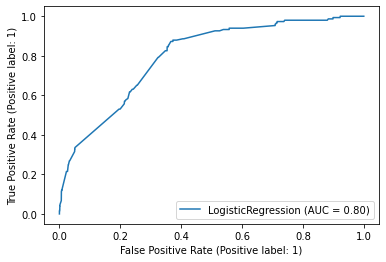

In [208]:
from sklearn import metrics
metrics.plot_roc_curve(model, X_test, y_test)

# Modelo DecisionTreeClassifier

Este modelo muestra en sus predicciones unos valores perfectos, lo cual es una señal de que no está bien (la predicción da 1 hacia una clase u otra y eso puede significar una mala elección de datos o una sobreentrenamiento de los mismos)

In [209]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier(class_weight='balanced', splitter='random')

y = y_train 
X = X_train 

model2.fit(X, y)

y_test = y_test 
X_test = X_test 

predictions = model2.predict(X_test) # Predecir con el modelo
probability = model2.predict_proba(X_test)

resultados_model_2 = pd.DataFrame(columns=['Predicción', 'Viral', 'No viral', 'Correcto'])
resultados_model_2['Predicción'] = predictions
resultados_model_2['Viral'] = probability[:, 0]
resultados_model_2['No viral'] = probability[:, 1]
resultados_model_2['Correcto'] = (y_test.values == resultados_model_2.Predicción)
resultados_model_2.head(20)

,Predicción,Viral,No viral,Correcto
0,0,1.000000,0.000000,True
1,0,1.000000,0.000000,True
2,0,0.766706,0.233294,True
3,1,0.323326,0.676674,False
4,0,0.766706,0.233294,True
5,0,0.864616,0.135384,True
6,1,0.292380,0.707620,False
7,0,1.000000,0.000000,True
8,1,0.210577,0.789423,False
9,0,0.818241,0.181759,True


En este modelo, aumenta un ~4% el rango de correctos/incorrectos

In [210]:
print('Correctos:',len(resultados_model_2[resultados_model_2['Correcto'] == True]),
'// Incorrectos:',len(resultados_model_2[resultados_model_2['Correcto'] == False]))

print('Porcentaje:',(len(resultados_model_2[resultados_model_2['Correcto'] == True]) * 1) / len(resultados_model_2['Correcto']))

Correctos: 9932 // Incorrectos: 4372
Porcentaje: 0.694351230425056


In [211]:
from sklearn.metrics import roc_auc_score

score_model2 = roc_auc_score(y_test, probability[:, 1])
score_model2

0.802583572574967

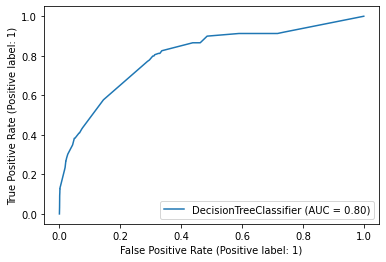

In [212]:
from sklearn import metrics

metrics.plot_roc_curve(model2, X_test, y_test)

# Comparación de los dos modelos

Con esta gráfica podemos comprobar que las dos curvas ROC son bastante similares y con un valor final prácticamente igual. Las unicas diferencias notables es que a partir de la segunda mitad los valores del modelo de regresión logística son más altos 

Text(0.5, 0.98, 'Comparación de la curva ROC')

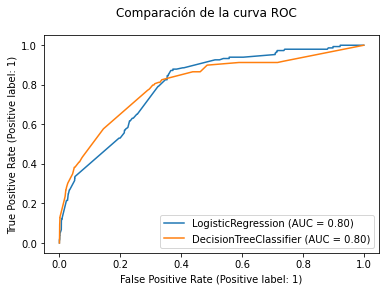

In [213]:
from sklearn.metrics import plot_roc_curve

svc_disp = plot_roc_curve(model, X_test, y_test)
rfc_disp = plot_roc_curve(model2, X_test, y_test, ax=svc_disp.ax_)
rfc_disp.figure_.suptitle("Comparación de la curva ROC")

In [214]:
print(f'Modelo LogisticRegression: {score_model1} \nModelo DecisionTreeClassifier: {score_model2} \nDiferencia de {abs(score_model1 - score_model2)}')

Modelo LogisticRegression: 0.7961623350299536 
Modelo DecisionTreeClassifier: 0.802583572574967 
Diferencia de 0.006421237545013447


In [215]:
per_model1 = (len(resultados_model_1[resultados_model_1['correct'] == True]) * 1) / len(resultados_model_1['correct'])
per_model2 = (len(resultados_model_2[resultados_model_2['Correcto'] == True]) * 1) / len(resultados_model_2['Correcto'])
print(f'Porcentaje de predicciones acertadas del modelo DecisionTreeClassifier: {per_model2}')
print(f'Porcentaje de predicciones acertadas del modelo LinearRegression: {per_model1}')
print(f'La diferencia es de: {abs(per_model1 - per_model2)}')

Porcentaje de predicciones acertadas del modelo DecisionTreeClassifier: 0.694351230425056
Porcentaje de predicciones acertadas del modelo LinearRegression: 0.6493288590604027
La diferencia es de: 0.04502237136465326


# Graficos de importancia en el modelo DecisionTreeClassifier

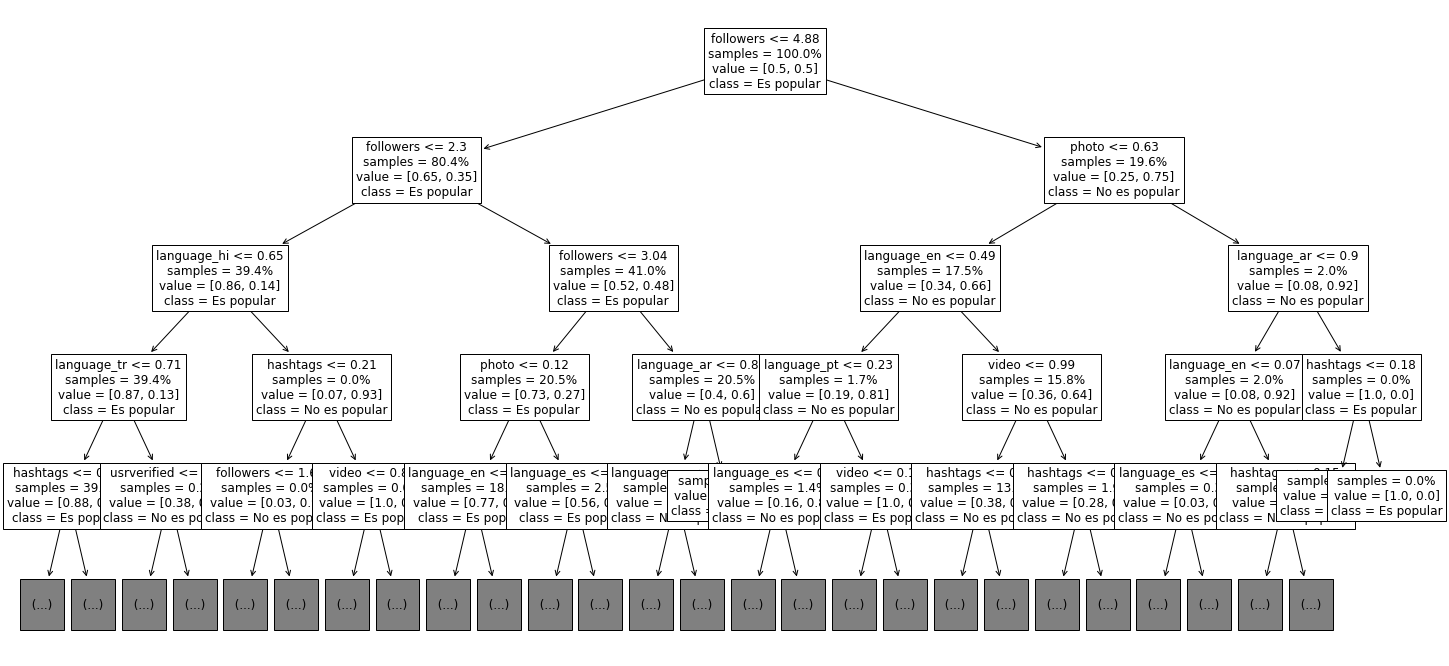

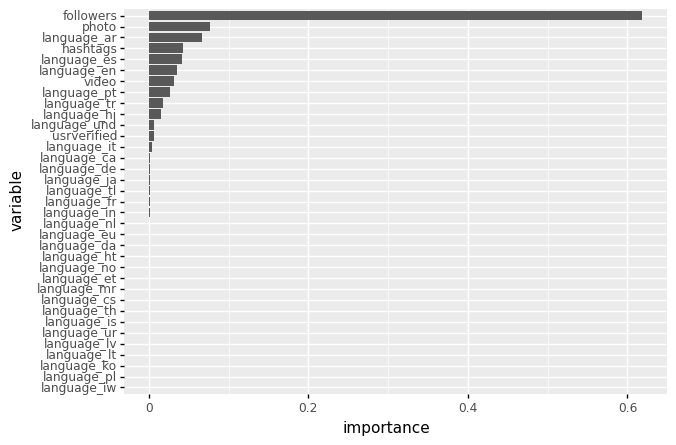

In [216]:
import sklearn.tree
from matplotlib import pyplot as plt

feature_names = X.columns

plt.figure(figsize=(25, 12))
sklearn.tree.plot_tree(
    model2, fontsize=12, feature_names=feature_names, class_names=['Es popular', 'No es popular'], max_depth=4, 
    impurity=False, proportion=True, precision=2
)
plt.show()

graph_data = pd.DataFrame(
    [(imp, variable) for imp, variable in zip(model2.feature_importances_, feature_names)], 
    columns=['importance', 'variable']
).sort_values('importance', ascending=False)

limit = 35 # Para no ver todas las variables si tenemos muchas
graph = (
    pn.ggplot(graph_data.head(limit), pn.aes(x='variable', y='importance')) 
    + pn.geom_col()
    + pn.coord_flip()
    + pn.theme(figure_size=(7, 5))
    + pn.scale_x_discrete(limits=graph_data.head(limit).variable.unique()[::-1])
)

graph.draw();

Como se puede observar en la gráfica de importancia de los datos, los followers tienen una importancia inmensa respecto a los demas datos. Esto podría tratarse de un fallo y se podría corregir quitandole importancia a este campo o bien modificando y/o añadiendo más datos para que estos resten importancia a la columna de followers

# CONCLUSIÓN

Tras un analisis de nuestros datos y la transformación de los mismos, hemos obtenido unos datos capaces de poder realizar la tarea. Tras el paso de estos datos por dos modelos, DecissionTreeClassifier y LogisticRegresion, vemos que en el rango de predicciones acertadas/fallidas, el primer modelo mencionado es mejor por un ~4%, Pero en la curva ROC, el segundo modelo tiene una mayor puntuación. También vemos que algunos resultados del primer modelo en términos de predicciones ha habido valores absolutos (predicciones de 1 sobre una clase). Esto significa que hay un sobre-entrenamiento de los datos o algun fenómeno que hace que nuestro modelo calcule datos de forma automática en base a un patrón en los datos y, por lo tanto, no se podría aplicar sobre el mundo real.